import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
data=pd.read_json("./Sarcasm_Headlines_Dataset.json",lines=True)

In [5]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


data.shape

In [6]:
headlines=list(data["headline"])
labels=list(data["is_sarcastic"])

In [8]:
vocab_size=10000
max_length=120
embedding_dim=16
trunc_type="post"
padding_type="post"
oov_tok="<oov>"
training_size=20000

In [23]:
training_sentences=headlines[:training_size]
testing_sentence=headlines[training_size:]

training_labels=labels[:training_size]
testing_labels=labels[training_size:]

Preprocess Sentences

In [25]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
training_word_index=tokenizer.word_index

training_sequence=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequence,maxlen=max_length,truncating=trunc_type,padding=padding_type)

testing_sequence=tokenizer.texts_to_sequences(testing_sentence)
testing_padded=pad_sequences(testing_sequence,maxlen=max_length,truncating=trunc_type,padding=padding_type)

In [26]:
training_padded=np.array(training_padded)
testing_padded=np.array(testing_padded)

training_labels=np.array(training_labels)
testing_labels=np.array(testing_labels)

In [28]:
testing_padded.shape,training_padded.shape

((6709, 120), (20000, 120))

Define Neural Network Model

In [15]:
import tensorflow as tf

In [34]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
num_epoch=30
history=model.fit(training_padded,training_labels,
                 epochs=num_epoch,
                 validation_data=(testing_padded,testing_labels),
                 verbose=2)

Epoch 1/30
625/625 - 1s - 2ms/step - accuracy: 0.5648 - loss: 0.6786 - val_accuracy: 0.7041 - val_loss: 0.6603
Epoch 2/30
625/625 - 1s - 971us/step - accuracy: 0.7374 - loss: 0.5458 - val_accuracy: 0.7880 - val_loss: 0.4707
Epoch 3/30
625/625 - 1s - 971us/step - accuracy: 0.8135 - loss: 0.4176 - val_accuracy: 0.8015 - val_loss: 0.4226
Epoch 4/30
625/625 - 1s - 974us/step - accuracy: 0.8457 - loss: 0.3617 - val_accuracy: 0.8346 - val_loss: 0.3840
Epoch 5/30
625/625 - 1s - 967us/step - accuracy: 0.8558 - loss: 0.3339 - val_accuracy: 0.8097 - val_loss: 0.4035
Epoch 6/30
625/625 - 1s - 971us/step - accuracy: 0.8739 - loss: 0.3017 - val_accuracy: 0.8095 - val_loss: 0.4092
Epoch 7/30
625/625 - 1s - 963us/step - accuracy: 0.8874 - loss: 0.2778 - val_accuracy: 0.8125 - val_loss: 0.4046
Epoch 8/30
625/625 - 1s - 956us/step - accuracy: 0.8913 - loss: 0.2642 - val_accuracy: 0.8128 - val_loss: 0.4087
Epoch 9/30
625/625 - 1s - 965us/step - accuracy: 0.9010 - loss: 0.2430 - val_accuracy: 0.7946 - va

visualization of Train & Validation Accuracy

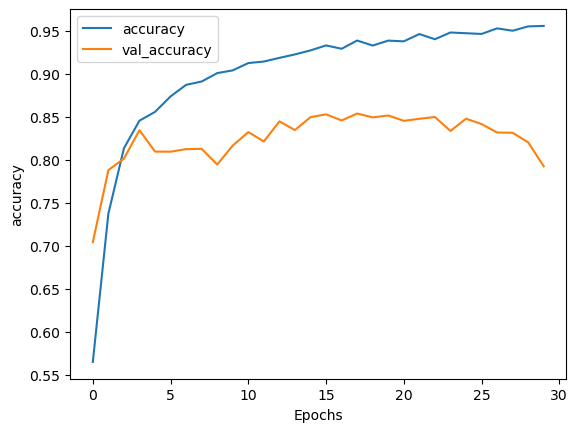

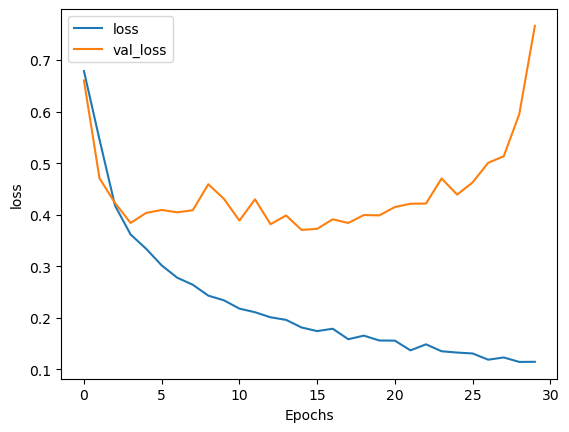

In [38]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Classifing New Sentence

In [39]:
sentence = ["the baby boy fears spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[9.8564953e-05]
 [1.2721325e-03]]
